3 Data analysis and visualization
======
***

3.2 Wikipedia data analysis and visualization
------

### 3.2.1 Static visualization with matplotlib

In [7]:
# import pandas python library
import pandas as pd 
# set dataframe maximum display number
pd.set_option('display.max_rows', 100)

In [8]:
# Read data from file 
data = pd.read_csv("cleandata_explorers.csv") 
# Preview the first 5 lines of the loaded data 
print(data.head())
# show data frame dimension
print(data.shape)


                              name  \
0                 Antonio de Abreu   
1                    William Adams   
2                     Diogo Afonso   
3  Sir Crispin Agnew of Lochnaw Bt   
4                  Charles Albanel   

                                                area century nationality  
0                                          Indonesia    16th  Portuguese  
1                                              Japan    17th     English  
2                            Northwest African coast    15th  Portuguese  
3  Greenland, Elephant Island, Northern Patagonia...    20th    Scottish  
4                                             Canada    17th      French  
(787, 4)


In [9]:
data.drop_duplicates()
data.shape

(787, 4)

19th       204
16th       135
20th       129
15th        81
18th        79
17th        66
21st        31
13th        10
14th         9
9th          7
10th         7
11th         6
6th BC       4
4th BC       4
8th          3
1st BC       2
2nd BC       2
12th         2
5th BC       1
20th BC      1
6th          1
15th BC      1
3rd BC       1
7th          1
Name: century, dtype: int64


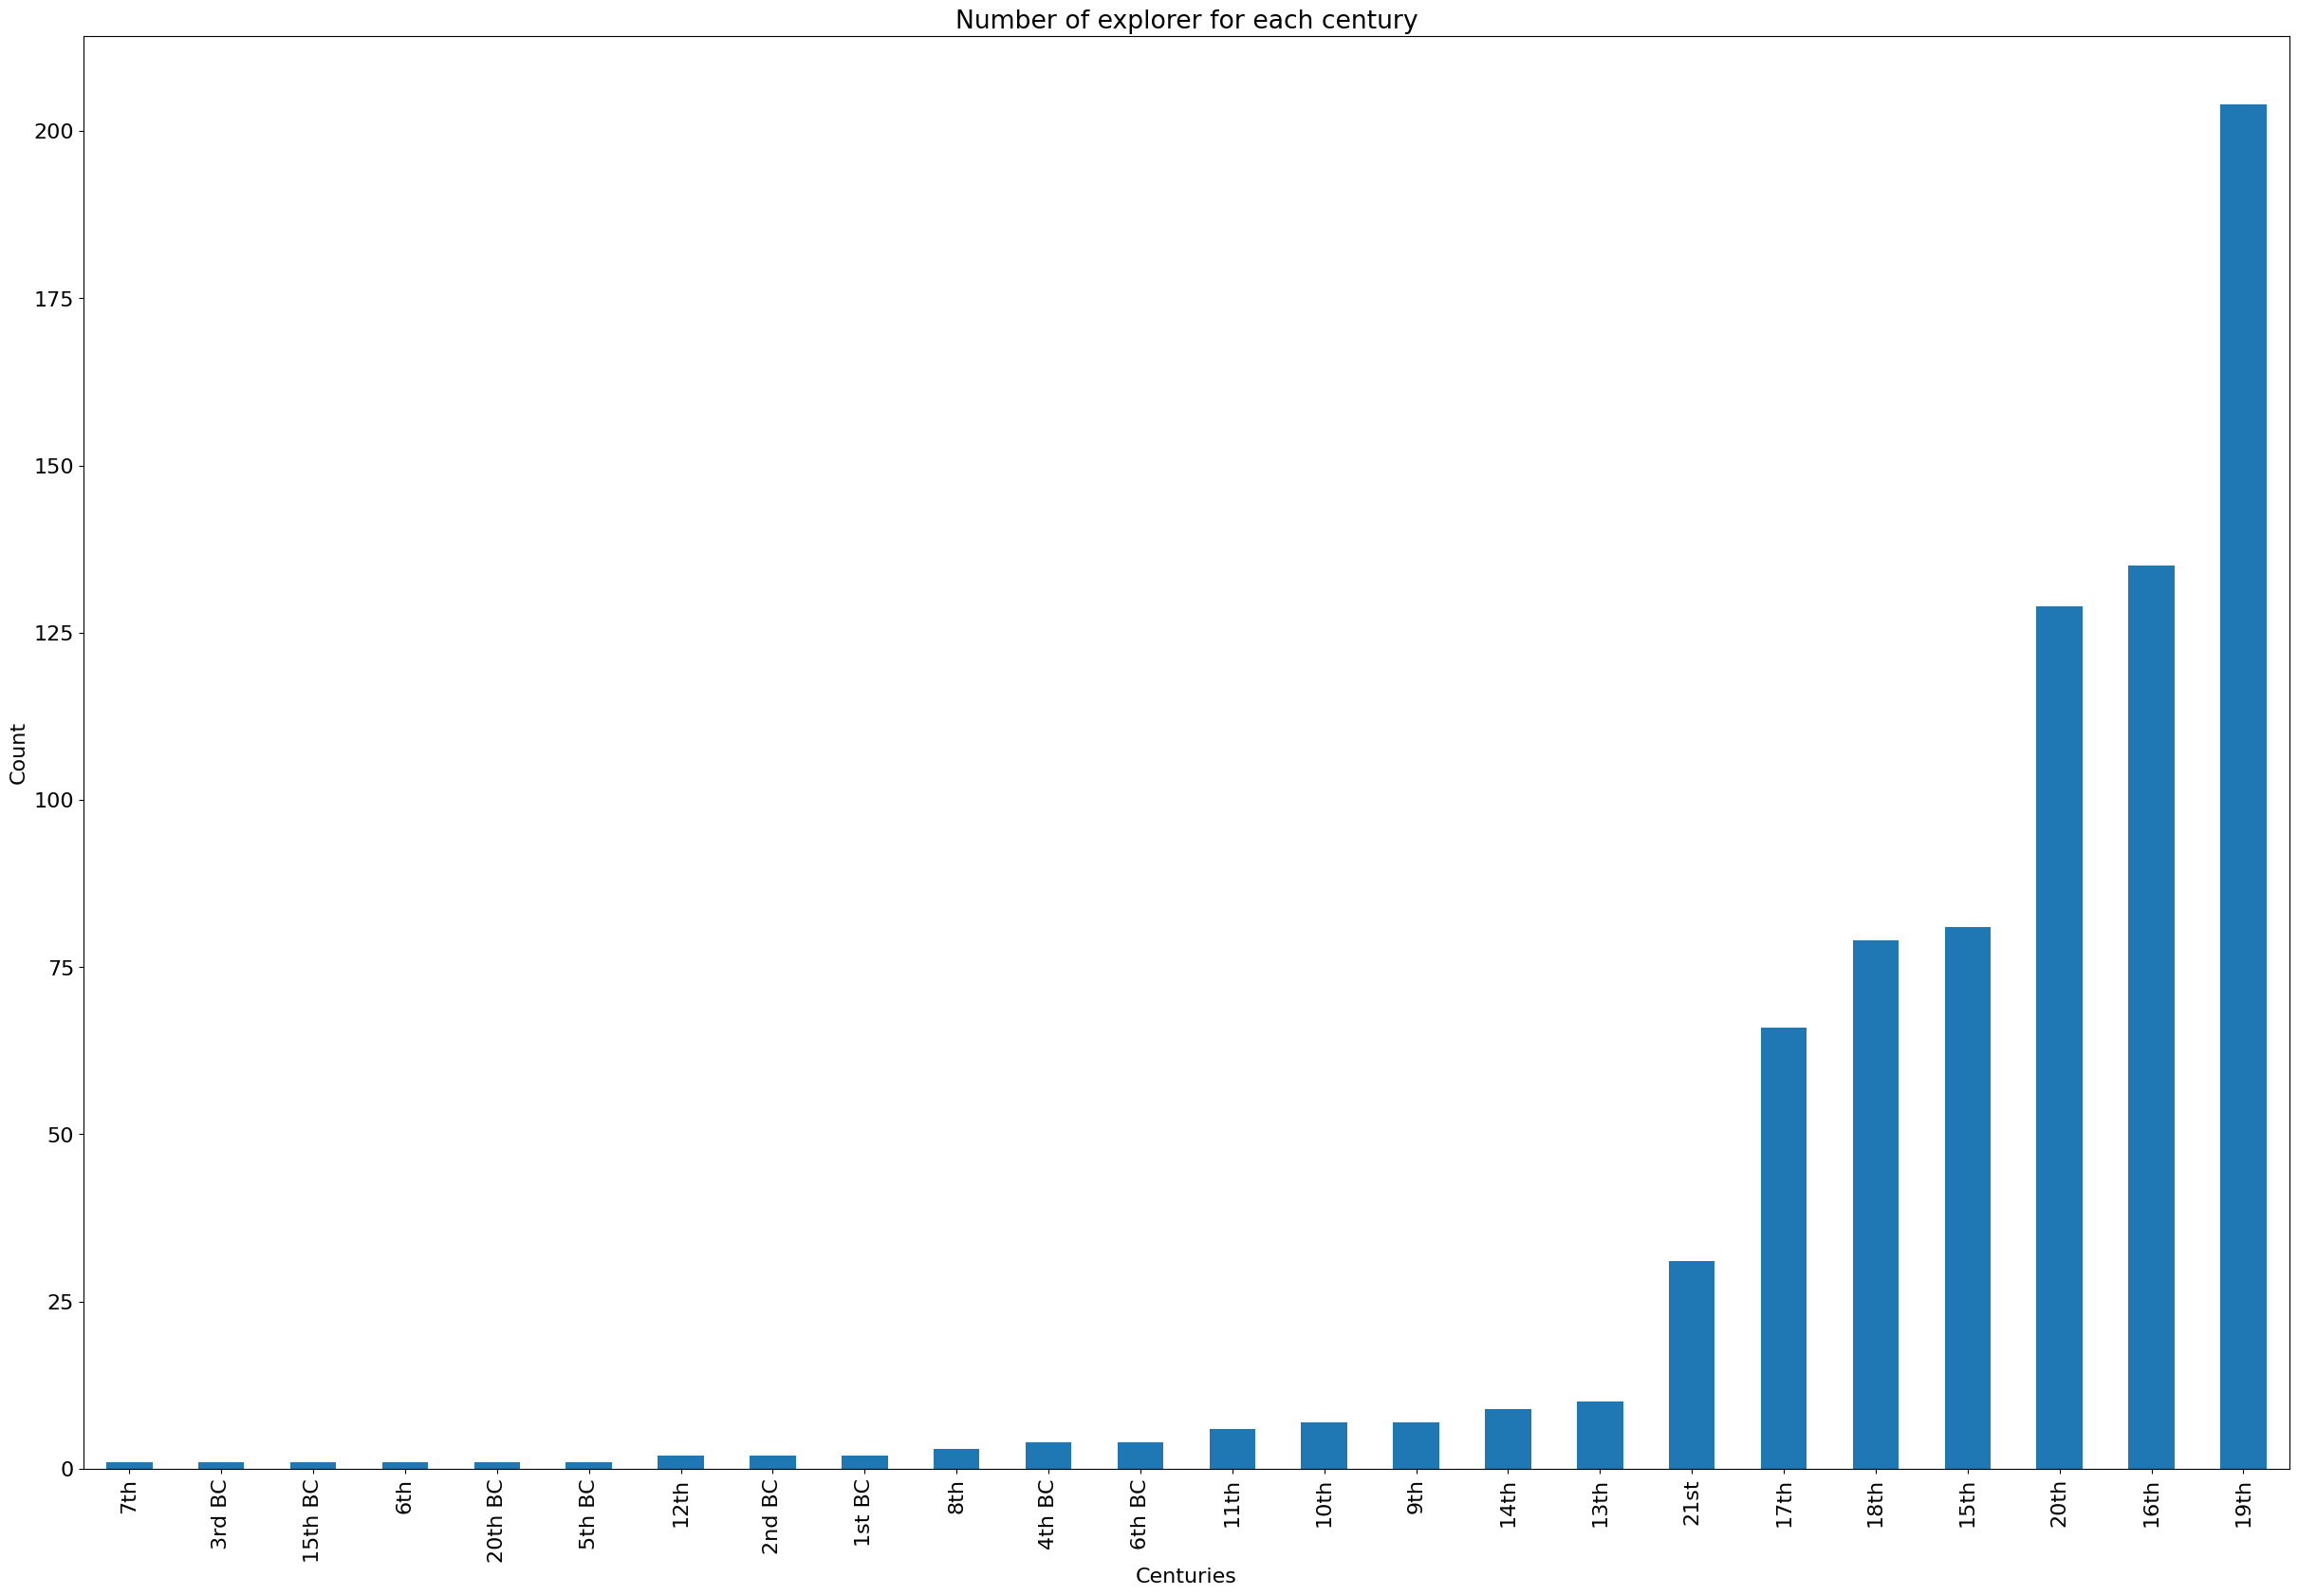

In [10]:
# show explorer data sorted by century count
print(data['century'].value_counts(ascending=False))
# import plot graph library
import matplotlib.pyplot as plt
# set graph figure size
plt.figure(figsize=(30,20), dpi=100)
# set plot graph data, label, fontsize
data['century'].value_counts(ascending=True).plot(kind='bar',title="Number of explorer for each century")
plt.xlabel("Centuries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 16})
plt.show()

In [11]:
# create new data frame - explorer data grouped and sorted by nationality count
natCountF = data['nationality'].value_counts(ascending=False).rename_axis('nationality').reset_index(name='counts')
print(natCountF.head())
print(natCountF.shape)
print(natCountF)

  nationality  counts
0  Portuguese     124
1     English      87
2     Spanish      68
3    American      68
4      French      54
(79, 2)
     nationality  counts
0     Portuguese     124
1        English      87
2        Spanish      68
3       American      68
4         French      54
5        Russian      43
6        Italian      33
7         German      31
8       Scottish      24
9          Irish      17
10         Dutch      16
11       British      13
12      Canadian      12
13         Greek      11
14       Chinese       8
15        Baltic       8
16        Danish       8
17    Australian       8
18     Norwegian       7
19     Hungarian       7
20         Welsh       7
21       Swedish       6
22         Norse       6
23       Belgian       6
24        Viking       5
25       Genoese       5
26     Brazilian       5
27            ic       5
28          Icel       4
29      Egyptian       4
30      Venetian       4
31         Swiss       4
32      Siberian       4
33       C

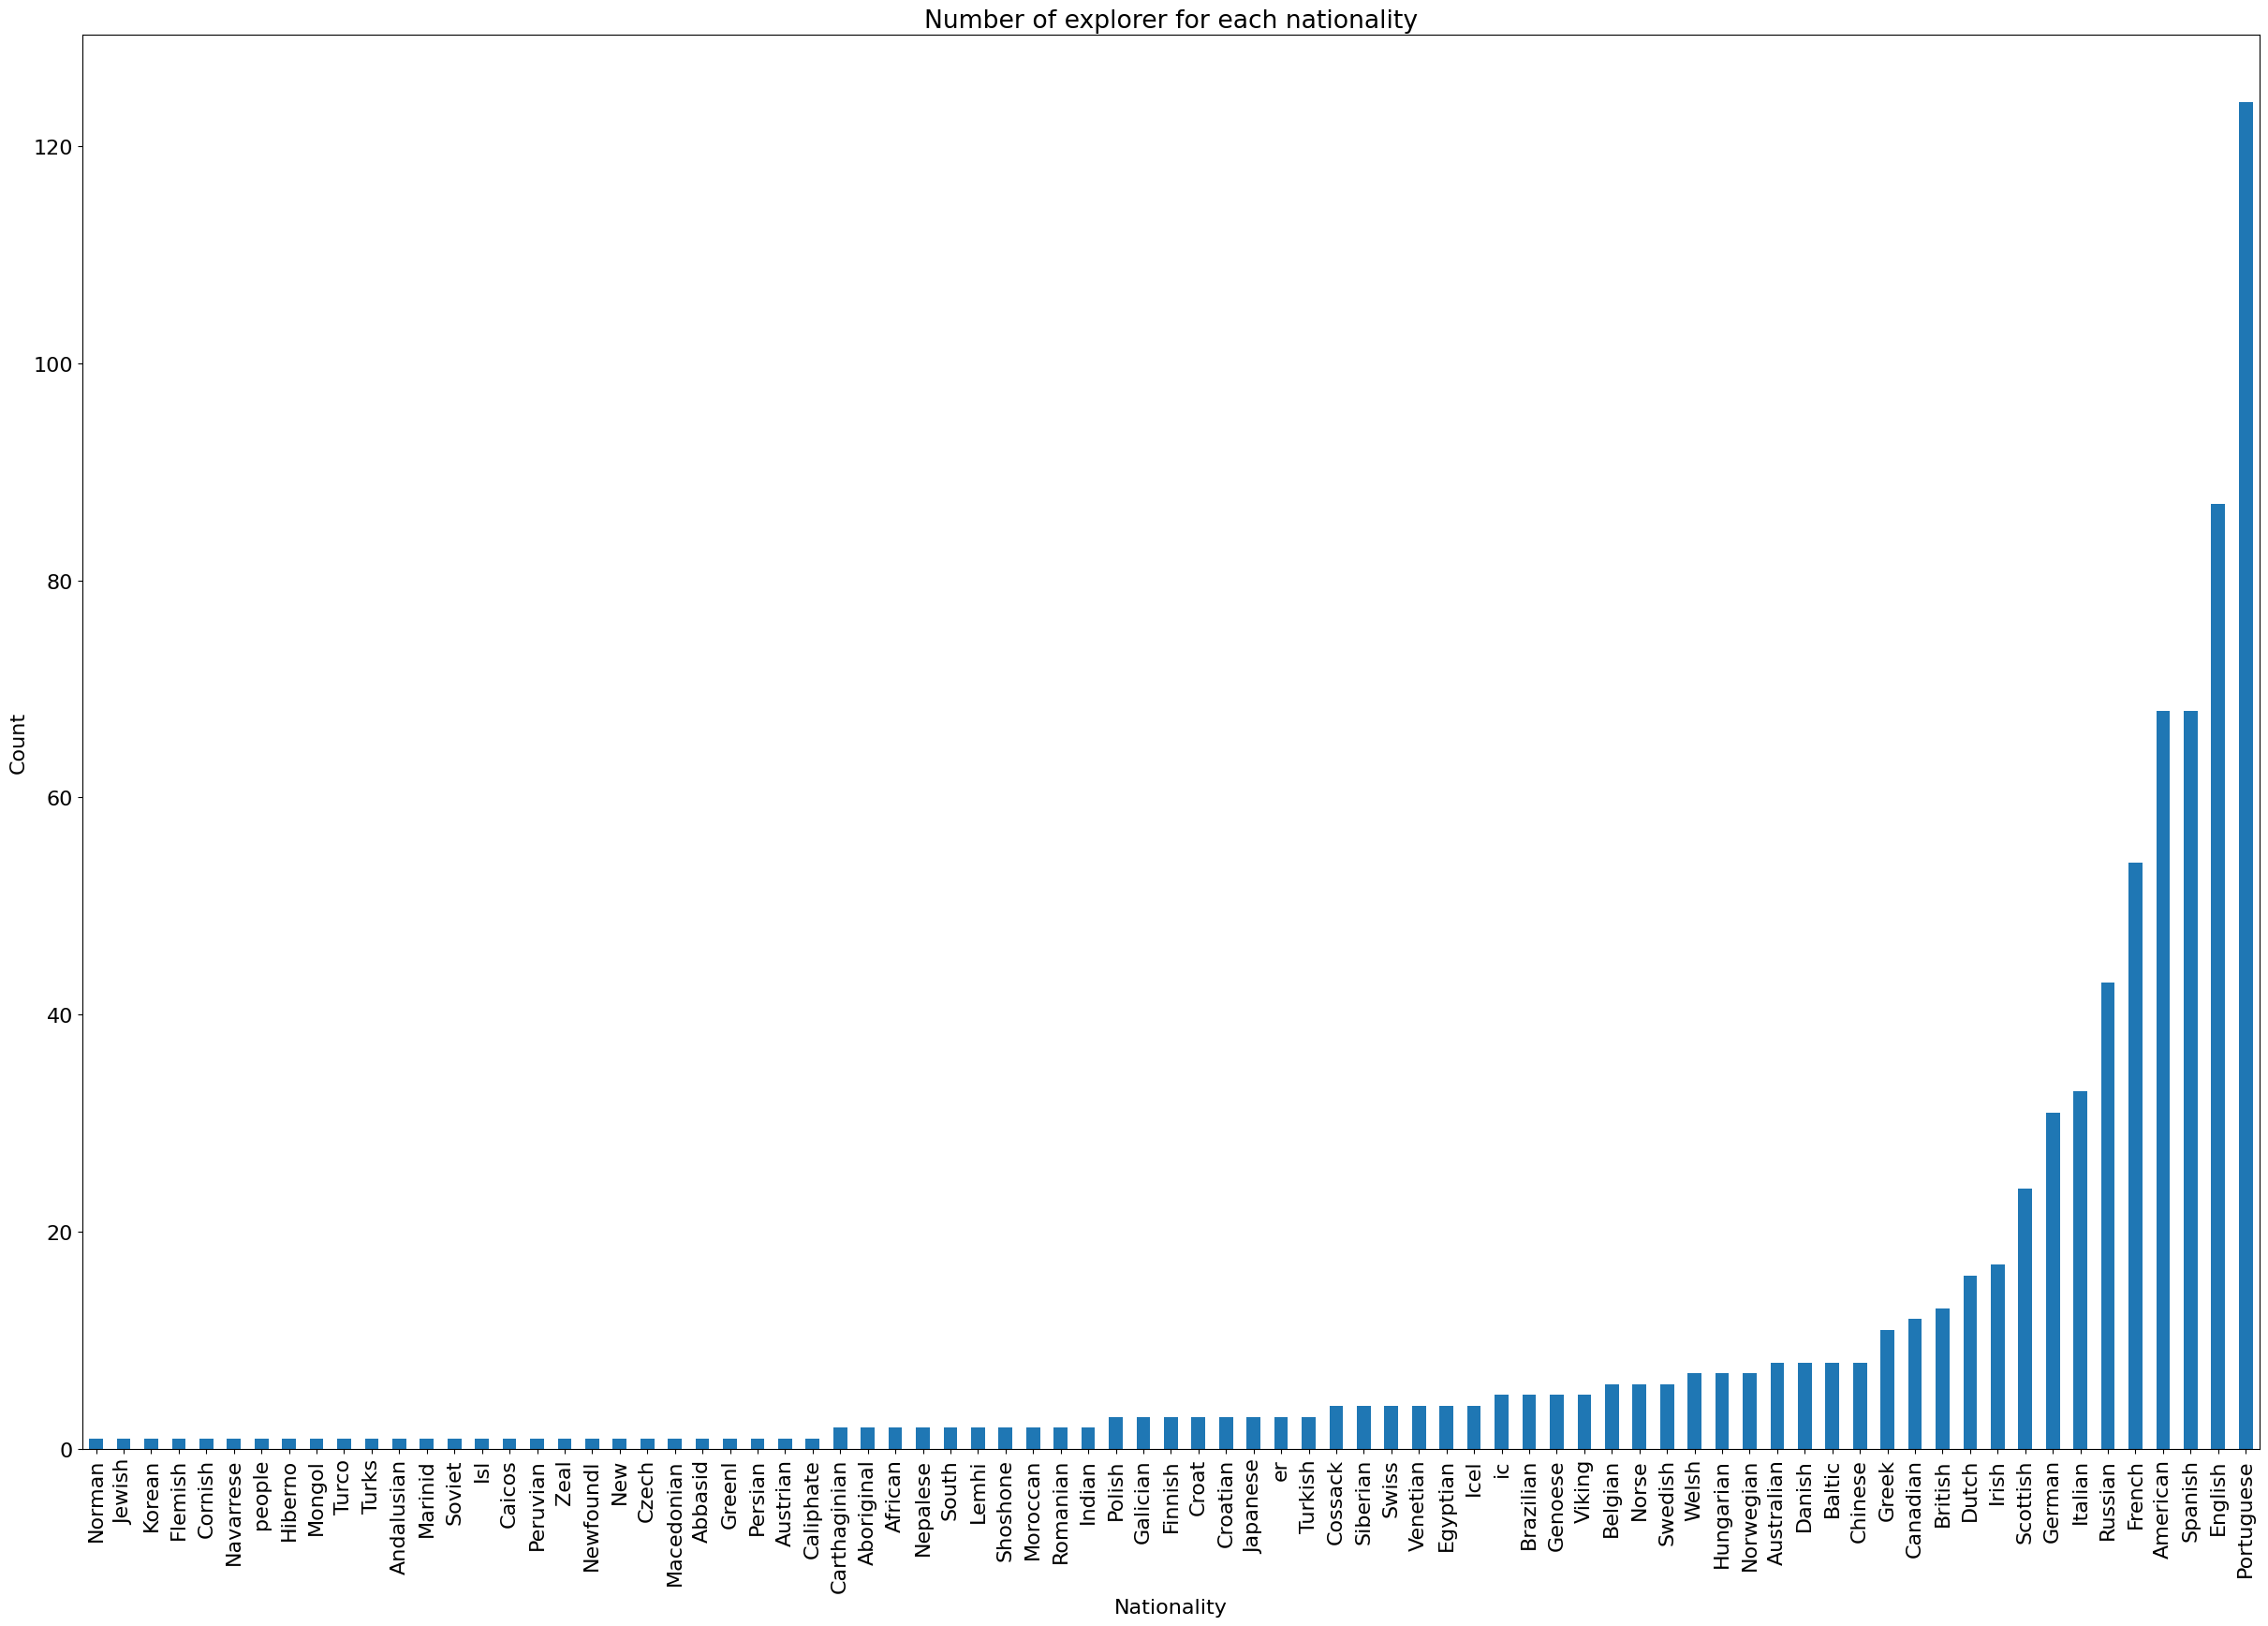

In [12]:
# set plot bar figure size
plt.figure(figsize=(30,20), dpi=100)
# show barchart by Number of explorer for each nationality
data['nationality'].value_counts(ascending=True).plot(kind='bar',title="Number of explorer for each nationality")
# set plot labels
plt.xlabel("Nationality")
plt.ylabel("Count")
# set plot fontsize
plt.rcParams.update({'font.size': 16})
#fig = plt.gcf()
# save barchart to image
plt.savefig('explorer-nationality.png', bbox_inches='tight')
#plt.show()


### 3.2.2 Static visualization with Plotly

In [15]:
# import plotly express package for interactive charts
import plotly.express as px

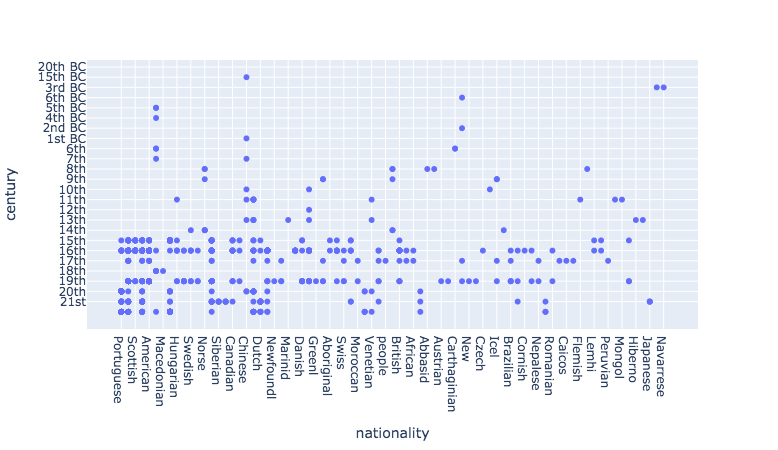

In [53]:
# Scatter chart for nationality, century explorer data distributions
fig = px.scatter(data, x='nationality', y='century')
fig.update_yaxes(tickmode = 'array',ticktext=["21st","20th","19th","18th","17th","16th","15th","14th","13th","12th","11th","10th","9th","8th","7th","6th", "1st BC","2nd BC","4th BC", "5th BC", "6th BC","3rd BC","15th BC","20th BC"],
                tickvals=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16", "17","18","19", "20", "21","22","23","24"])
fig.update_xaxes(type='-',nticks=50)

fig.show()

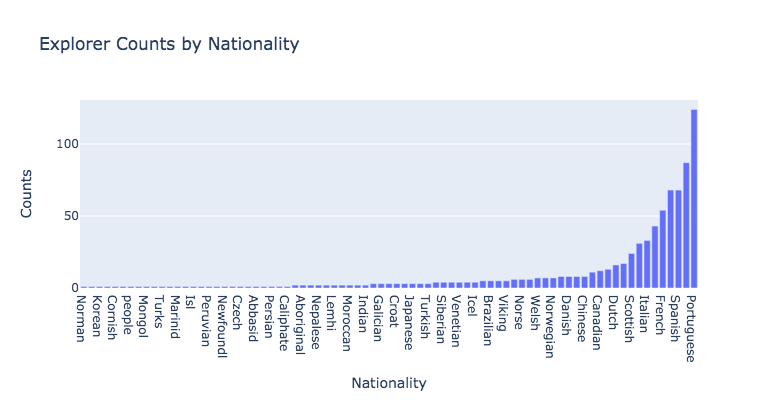

In [49]:
# create dataframe for nationality counts
nationality_counts = data['nationality'].value_counts(ascending=True).to_frame("Count").reset_index()
# show interative barchart by Number of explorer for each nationality
px.bar(
    nationality_counts, x="index", y="Count", 
    labels=dict(Count="Counts", index="Nationality"), 
    width=800, height=400, title="Explorer Counts by Nationality"
)

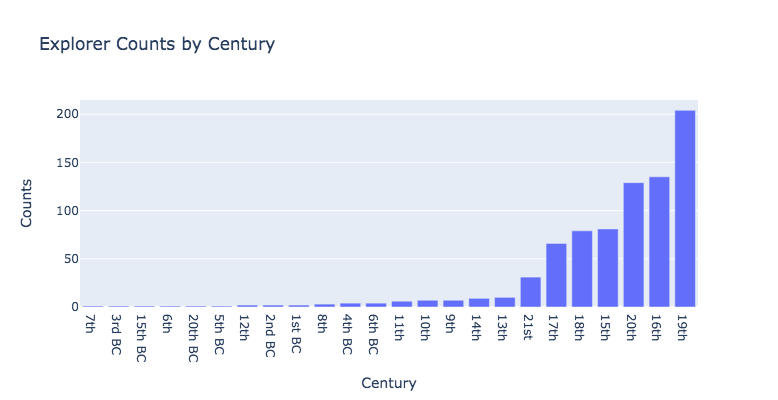

In [50]:
# create dataframe for century counts
century_counts = data['century'].value_counts(ascending=True).to_frame("Count").reset_index()
# show interative barchart by Number of explorer for each century
px.bar(
    century_counts, x="index", y="Count", 
    labels=dict(Count="Counts", index="Century"), 
    width=800, height=400, title="Explorer Counts by Century"
)